# 1. Nhập thư viện xử lý

In [341]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Tiền xử lý dữ liệu

In [342]:
# Đọc dữ liệu từ file CSV
# Sử dụng encoding='ISO-8859-1' khi tệp chứa ký tự không tương thích với 'utf-8'. Mã hóa này hỗ trợ các ký tự đặc biệt từ các ngôn ngữ châu Âu, giúp tránh lỗi giải mã khi đọc tệp có ký tự đặc biệt như á, é, hoặc các ký tự từ hệ thống cũ.
df = pd.read_csv('ITBLogisticDataset.csv', encoding='ISO-8859-1')
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [343]:
# Kiểm tra các cột có trong DataFrame
print(df.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [205]:
# Liệt kê các cột bạn muốn loại bỏ
columns_to_drop = [
    'Type', 'Benefit per order', 'Customer City', 'Customer Country',
    'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Segment',
    'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id',
    'Department Name', 'Latitude', 'Longitude', 'Market', 'Order Country',
    'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
    'Order Item Discount Rate', 'Order Item Id', 'Order Item Profit Ratio',
    'Order Profit Per Order', 'Order State', 'Product Card Id', 'Product Category Id',
    'Product Price', 'Product Status', 'shipping date (DateOrders)','Customer Password', 
    'Product Image', 'Customer Email', 'Product Description','Order Zipcode','Order Status'
]

# Loại bỏ các cột không cần thiết và tạo DataFrame mới
data = df.drop(columns=columns_to_drop)

In [206]:
# Kiểm tra lại cột dữ liệu sau khi đã xử lý
print(data.columns)

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Sales per customer', 'Delivery Status', 'Late_delivery_risk',
       'Category Id', 'Category Name', 'Order City', 'order date (DateOrders)',
       'Order Item Product Price', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Region', 'Product Name', 'Shipping Mode'],
      dtype='object')


In [344]:
# Kiểm tra lại dữ liệu
data.head(50)

,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Order City,order date (DateOrders),Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Order Region,Product Name,Shipping Mode,Total Sales by Category,Cumulative Percentage,Is_Late
64,2,2,269.970001,Shipping on time,0,9,Cardio Equipment,Drancy,2017-07-22 07:16:00,99.989998,3,299.970001,269.970001,Western Europe,Nike Men's Free 5.0+ Running Shoe,Second Class,3.694843e+06,6.0,Đúng giờ
65,6,2,224.979996,Late delivery,1,9,Cardio Equipment,Nantes,2017-08-07 06:33:00,99.989998,3,299.970001,224.979996,Western Europe,Nike Men's Free 5.0+ Running Shoe,Second Class,3.694843e+06,6.0,Trễ
67,2,2,167.369995,Shipping on time,0,17,Cleats,Gateshead,2017-07-02 09:03:00,59.990002,3,179.970001,167.369995,Northern Europe,Perfect Fitness Perfect Rip Deck,Second Class,4.431943e+06,2.0,Đúng giờ
69,3,2,161.970001,Late delivery,1,17,Cleats,Hayange,2017-08-20 07:03:00,59.990002,3,179.970001,161.970001,Western Europe,Perfect Fitness Perfect Rip Deck,Second Class,4.431943e+06,2.0,Trễ
70,2,2,139.500000,Shipping on time,0,24,Women's Apparel,Drancy,2017-07-22 07:16:00,50.000000,3,150.000000,139.500000,Western Europe,Nike Men's Dri-FIT Victory Golf Polo,Second Class,3.147800e+06,8.0,Đúng giờ
71,4,2,107.970001,Late delivery,1,29,Shop By Sport,Portsmouth,2017-08-04 02:31:00,39.990002,3,119.970001,107.970001,Northern Europe,Under Armour Girls' Toddler Spine Surge Runni,Second Class,1.309522e+06,16.0,Trễ
72,3,2,112.500000,Late delivery,1,24,Women's Apparel,Gelsenkirchen,2017-09-18 01:14:00,50.000000,3,150.000000,112.500000,Western Europe,Nike Men's Dri-FIT Victory Golf Polo,Second Class,3.147800e+06,8.0,Trễ
75,5,2,178.169998,Late delivery,1,17,Cleats,Mejicanos,2017-04-02 16:43:00,59.990002,3,179.970001,178.169998,Central America,Perfect Fitness Perfect Rip Deck,Second Class,4.431943e+06,2.0,Trễ
76,4,2,170.970001,Late delivery,1,17,Cleats,David,2017-05-05 14:23:00,59.990002,3,179.970001,170.970001,Central America,Perfect Fitness Perfect Rip Deck,Second Class,4.431943e+06,2.0,Trễ
80,3,2,152.970001,Late delivery,1,17,Cleats,Santo Domingo,2017-06-06 15:03:00,59.990002,3,179.970001,152.970001,Caribbean,Perfect Fitness Perfect Rip Deck,Second Class,4.431943e+06,2.0,Trễ


In [345]:
# Kiểm tra cấu trúc dữ liệu
print(data.shape)

(53196, 19)


In [346]:
# Kiểm tra thông tin dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53196 entries, 64 to 179629
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Days for shipping (real)       53196 non-null  int64         
 1   Days for shipment (scheduled)  53196 non-null  int64         
 2   Sales per customer             53196 non-null  float64       
 3   Delivery Status                53196 non-null  object        
 4   Late_delivery_risk             53196 non-null  int64         
 5   Category Id                    53196 non-null  int64         
 6   Category Name                  53196 non-null  object        
 7   Order City                     53196 non-null  object        
 8   order date (DateOrders)        53196 non-null  datetime64[ns]
 9   Order Item Product Price       53196 non-null  float64       
 10  Order Item Quantity            53196 non-null  int64         
 11  Sales        

In [347]:
# Mô tả dữ liệu
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Sales per customer,Late_delivery_risk,Category Id,Order Item Product Price,Order Item Quantity,Sales,Order Item Total,Total Sales by Category,Cumulative Percentage
count,53196.000000,53196.000000,53196.000000,53196.000000,53196.000000,53196.000000,53196.000000,53196.000000,53196.000000,5.319600e+04,53196.000000
mean,3.502350,2.940616,199.468193,0.544477,34.344142,164.098898,1.994962,221.979776,199.468193,3.015530e+06,15.826115
std,1.616734,1.372671,153.934044,0.498023,17.455991,180.216002,1.411743,170.035051,153.934044,1.867488e+06,20.316116
min,0.000000,0.000000,8.470000,0.000000,2.000000,9.990000,1.000000,9.990000,8.470000,3.059590e+03,0.000000
25%,2.000000,2.000000,109.190002,0.000000,18.000000,50.000000,1.000000,129.990005,109.190002,2.888994e+06,4.000000
50%,3.000000,4.000000,170.970001,1.000000,32.000000,99.989998,1.000000,199.979996,170.970001,3.113845e+06,10.000000
75%,5.000000,4.000000,260.980011,1.000000,46.000000,199.990005,3.000000,299.980011,260.980011,4.118426e+06,14.000000
max,6.000000,4.000000,1939.989990,1.000000,76.000000,1999.989990,5.000000,1999.989990,1939.989990,6.929654e+06,98.000000


In [348]:
# Kiểm tra số lượng giá trị null trong mỗi cột
null_counts = data.isnull().sum()

# Chỉ ra các cột có giá trị null
columns_with_nulls = null_counts[null_counts > 0]

# In ra các giá trị null
print("Số lượng giá trị null trong mỗi cột:")
print(null_counts)
print("\nCác cột có giá trị null:")
print(columns_with_nulls)

Số lượng giá trị null trong mỗi cột:
Days for shipping (real)         0
Days for shipment (scheduled)    0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Order City                       0
order date (DateOrders)          0
Order Item Product Price         0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Region                     0
Product Name                     0
Shipping Mode                    0
Total Sales by Category          0
Cumulative Percentage            0
Is_Late                          0
dtype: int64

Các cột có giá trị null:
Series([], dtype: int64)


In [349]:
# Tìm các dòng trùng lặp
duplicated_rows = [data.duplicated()]
print(duplicated_rows)

[64        False
65        False
67        False
69        False
70        False
          ...  
179625    False
179626    False
179627    False
179628    False
179629    False
Length: 53196, dtype: bool]


# 3. Tính toán tỷ lệ sản phẩm trong doanh số bán hàng

In [364]:
# Tạo một cột mới cho tổng doanh số của mỗi danh mục sản phẩm
data['Total Sales by Category'] = data.groupby('Category Name')['Sales'].transform('sum')

In [214]:
# Tính tỷ lệ phần trăm lũy kế của doanh số bán hàng
data['Cumulative Percentage'] = data['Total Sales by Category'].rank(method="dense", ascending=False)
data['Cumulative Percentage'] = data['Cumulative Percentage'].apply(lambda x: (x - 1) / len(data['Total Sales by Category'].unique()) * 100)

In [215]:
# Sắp xếp dữ liệu
data_sorted = data.sort_values(by='Cumulative Percentage', ascending=True)

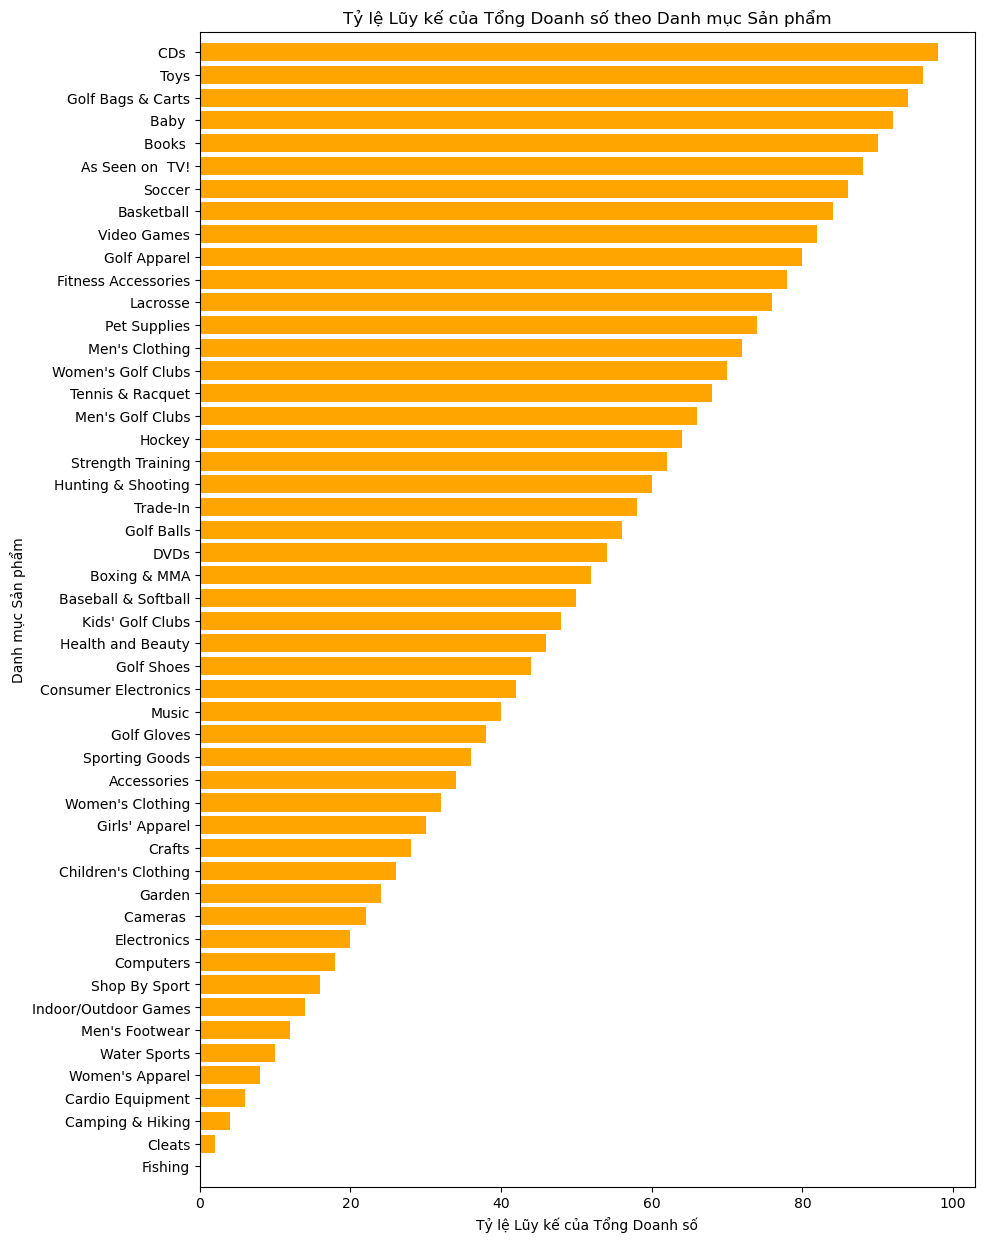

In [216]:
# Sắp xếp DataFrame dựa trên 'Cumulative Percentage' từ cao đến thấp
data_sorted = data_sorted.sort_values('Cumulative Percentage', ascending=False)

# Tạo biểu đồ
plt.figure(figsize=(10, 15))

# Vẽ biểu đồ thanh ngang, sử dụng màu cam
plt.barh(data_sorted['Category Name'], data_sorted['Cumulative Percentage'], color='orange')

# Điều chỉnh các nhãn trục
plt.xlabel('Tỷ lệ Lũy kế của Tổng Doanh số')
plt.ylabel('Danh mục Sản phẩm')

# Đặt tiêu đề cho biểu đồ
plt.title('Tỷ lệ Lũy kế của Tổng Doanh số theo Danh mục Sản phẩm')

# Đảo ngược thứ tự trên trục y để phần đầu của danh sách ở trên cùng
plt.gca().invert_yaxis()

# Điều chỉnh khoảng cách biên dọc để cải thiện tính rõ ràng
plt.margins(y=0.01)

# Loại bỏ lưới nền
plt.grid(False)

# Hiển thị biểu đồ
plt.show()

# 4. Tính toán độ co dãn của cầu trong doanh thu

In [350]:
# Chuyển đổi cột 'order date (DateOrders)' sang định dạng ngày giờ
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])

# Bây giờ, lọc dữ liệu cho năm 2017 và kiểm tra nếu các cột khác có giá trị không null
data = data[(data['order date (DateOrders)'].dt.year == 2017) &
            data['Product Name'].notnull() &
            data['Order Item Product Price'].notnull() &
            data['Order Item Quantity'].notnull()]

In [351]:
# Chia dữ liệu thành hai khoảng thời gian
data_first_half = data[data['order date (DateOrders)'].dt.month <= 6]
data_second_half = data[data['order date (DateOrders)'].dt.month > 6]

In [360]:
# Nhóm theo tên sản phẩm và tính tổng số lượng và giá trung bình
def calculate_ped(data):
    grouped = data.groupby('Product Name').agg({
        'Order Item Quantity': 'sum',
        'Order Item Product Price': 'mean'
    }).reset_index()
    return grouped

In [361]:
# Tính PED cho cả hai khoảng thời gian
first_half_ped = calculate_ped(data_first_half)
second_half_ped = calculate_ped(data_second_half)

In [372]:
# Tính phần trăm thay đổi về số lượng và giá
comparison['quantity_change'] = ((comparison['Order Item Quantity_second'] - comparison['Order Item Quantity_first']) / 
                                 comparison['Order Item Quantity_first']) * 100

comparison['price_change'] = ((comparison['Order Item Product Price_second'] - comparison['Order Item Product Price_first']) / 
                              comparison['Order Item Product Price_first']) * 100

# Loại bỏ những dòng mà sự thay đổi giá là 0 để tránh chia cho 0
comparison = comparison[comparison['price_change'] != 0]

# Tính PED
comparison['PED'] = comparison['quantity_change'] / comparison['price_change']

# Lọc các thay đổi đáng kể (PED > 1)
significant_changes = comparison[abs(comparison['PED']) > 1]

# Thể hiện kết quả
significant_changes

,Product Name,Order Item Quantity_first,Order Item Product Price_first,Order Item Quantity_second,Order Item Product Price_second,quantity_change,price_change,PED
3,Cleveland Golf Women's 588 RTX CB Satin Chrom,33,119.989998,37,119.989998,12.121212,1.184337e-14,1.023460e+15
14,Merrell Men's All Out Flash Trail Running Sho,43,109.989998,42,109.989998,-2.325581,-1.292013e-14,1.799967e+14
29,Pelican Sunstream 100 Kayak,2797,199.990005,1484,199.990006,-46.943153,2.842313e-14,-1.651583e+15


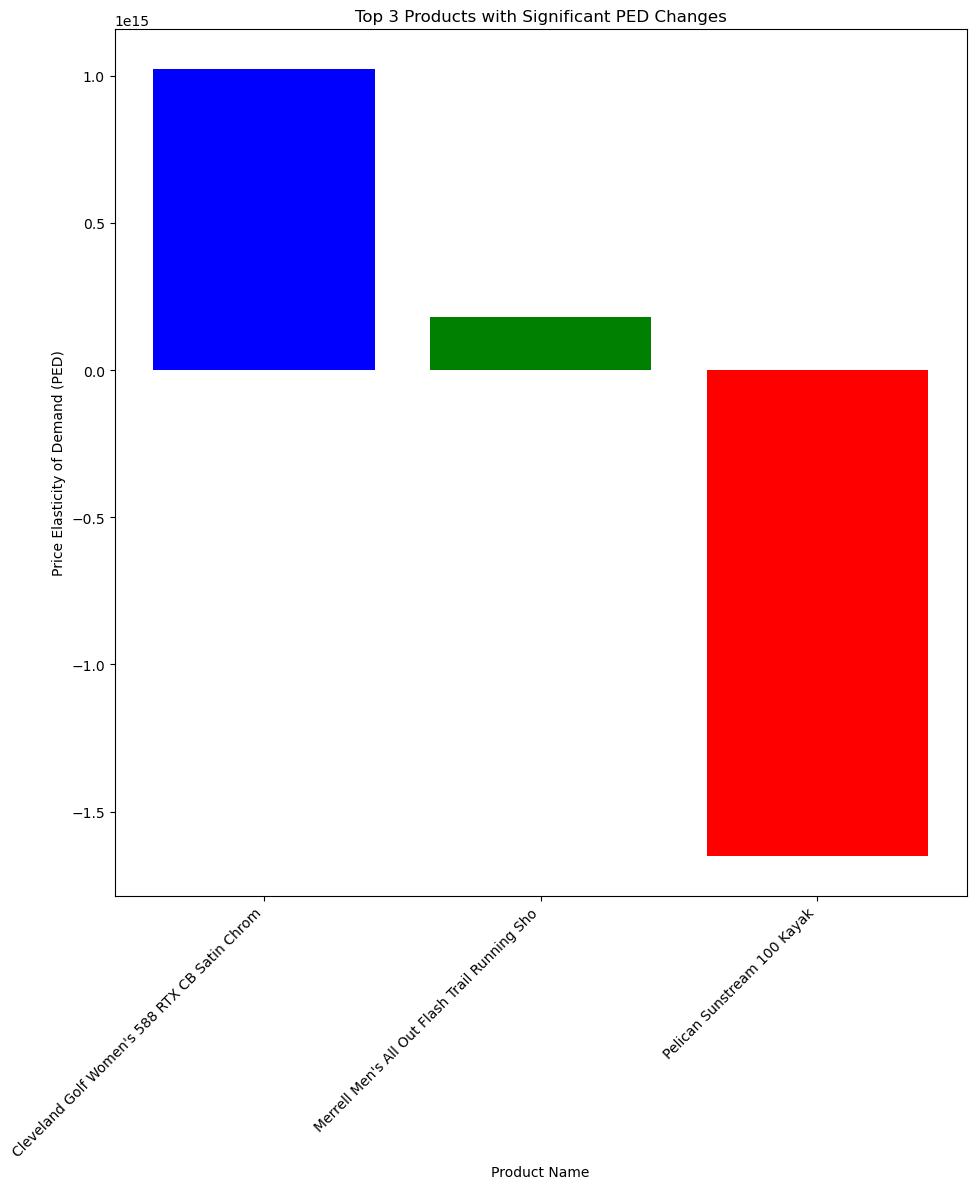

In [379]:
# Vẽ biểu đồ thể hiện kết quả
plt.figure(figsize=(10, 12))
plt.bar(significant_changes['Product Name'], significant_changes['PED'], color=['blue', 'green', 'red'])
plt.xlabel('Product Name')
plt.ylabel('Price Elasticity of Demand (PED)')
plt.title('Top 3 Products with Significant PED Changes')
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trên trục x để dễ đọc hơn
plt.tight_layout()
plt.show()

# 5. Vẽ biểu đồ thể hiện độ trễ theo từng khu vực và phương thức giao hàng

In [355]:
# Chuyển cột giao hàng trễ thành biến nhị phân, giả định 'Late_delivery_risk' chỉ ra nếu lô hàng bị trễ
data['Is_Late'] = data['Late_delivery_risk'].apply(lambda x: 'Trễ' if x == 1 else 'Đúng giờ')

In [356]:
# Nhóm dữ liệu để đếm các trường hợp
region_mode_lateness = data.groupby(['Order Region', 'Shipping Mode', 'Is_Late']).size().unstack().fillna(0)

In [224]:
# Chuẩn hóa dữ liệu để hiển thị tỷ lệ thay vì số lượng
region_mode_lateness_prop = region_mode_lateness.div(region_mode_lateness.sum(axis=1), axis=0)

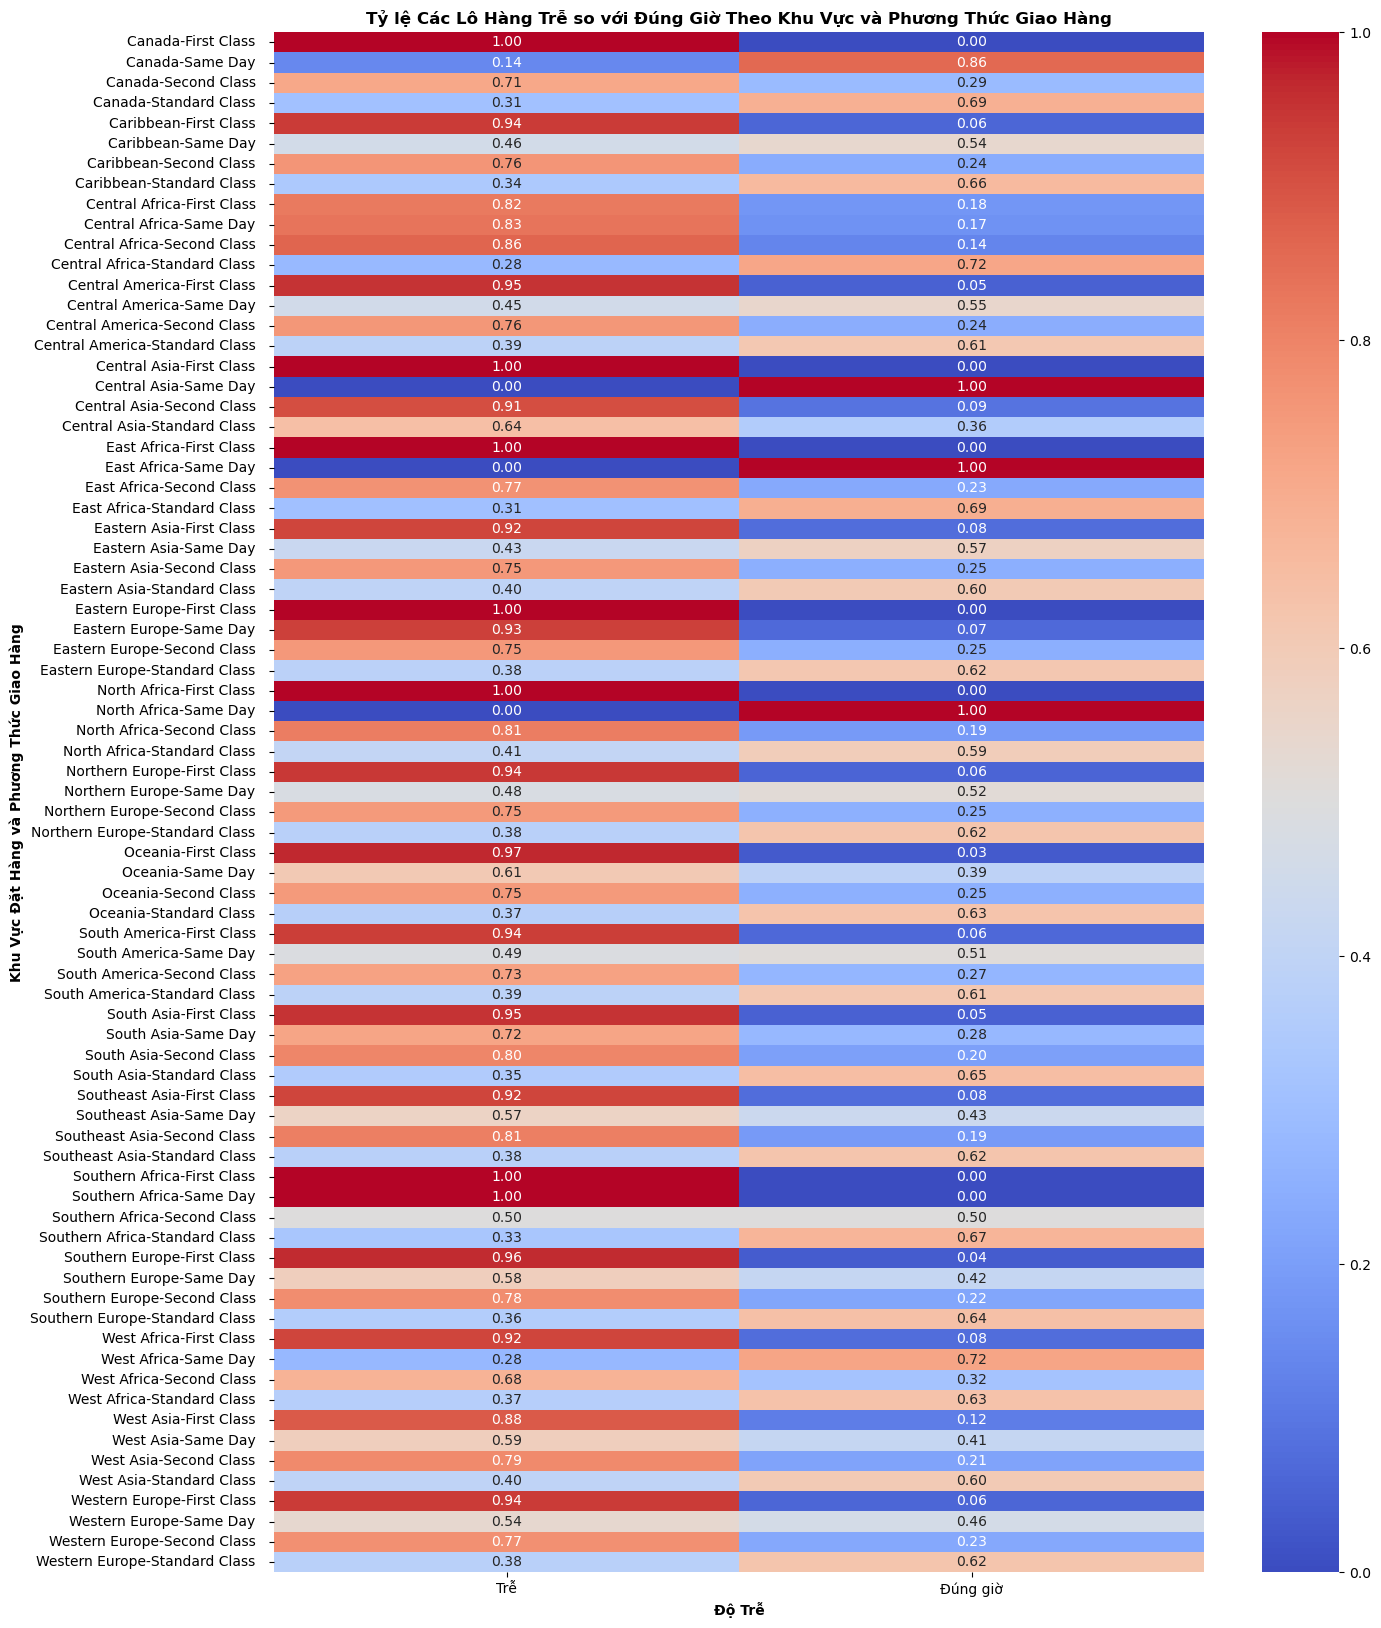

In [225]:
# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(15, 20))  

# Vẽ biểu đồ nhiệt
ax = sns.heatmap(region_mode_lateness_prop, annot=True, cmap='coolwarm', fmt=".2f")

# Đặt tiêu đề cho biểu đồ với kiểu chữ đậm
plt.title('Tỷ lệ Các Lô Hàng Trễ so với Đúng Giờ Theo Khu Vực và Phương Thức Giao Hàng', fontweight='bold')

# Đặt nhãn cho các trục
plt.ylabel('Khu Vực Đặt Hàng và Phương Thức Giao Hàng', fontweight='bold')
plt.xlabel('Độ Trễ', fontweight='bold')

# Điều chỉnh nhãn trục y
plt.yticks(rotation=0)  # Đặt nhãn trục y không xoay

# Tùy chỉnh khoảng cách giữa các nhãn trên trục y để cải thiện độ rõ ràng
ax.yaxis.set_tick_params(pad=10)  # Tăng khoảng cách padding cho mỗi nhãn

# Hiển thị biểu đồ
plt.show()

# 6. Chi tiết từng khu vực theo tỷ lệ

<Figure size 1200x1000 with 0 Axes>

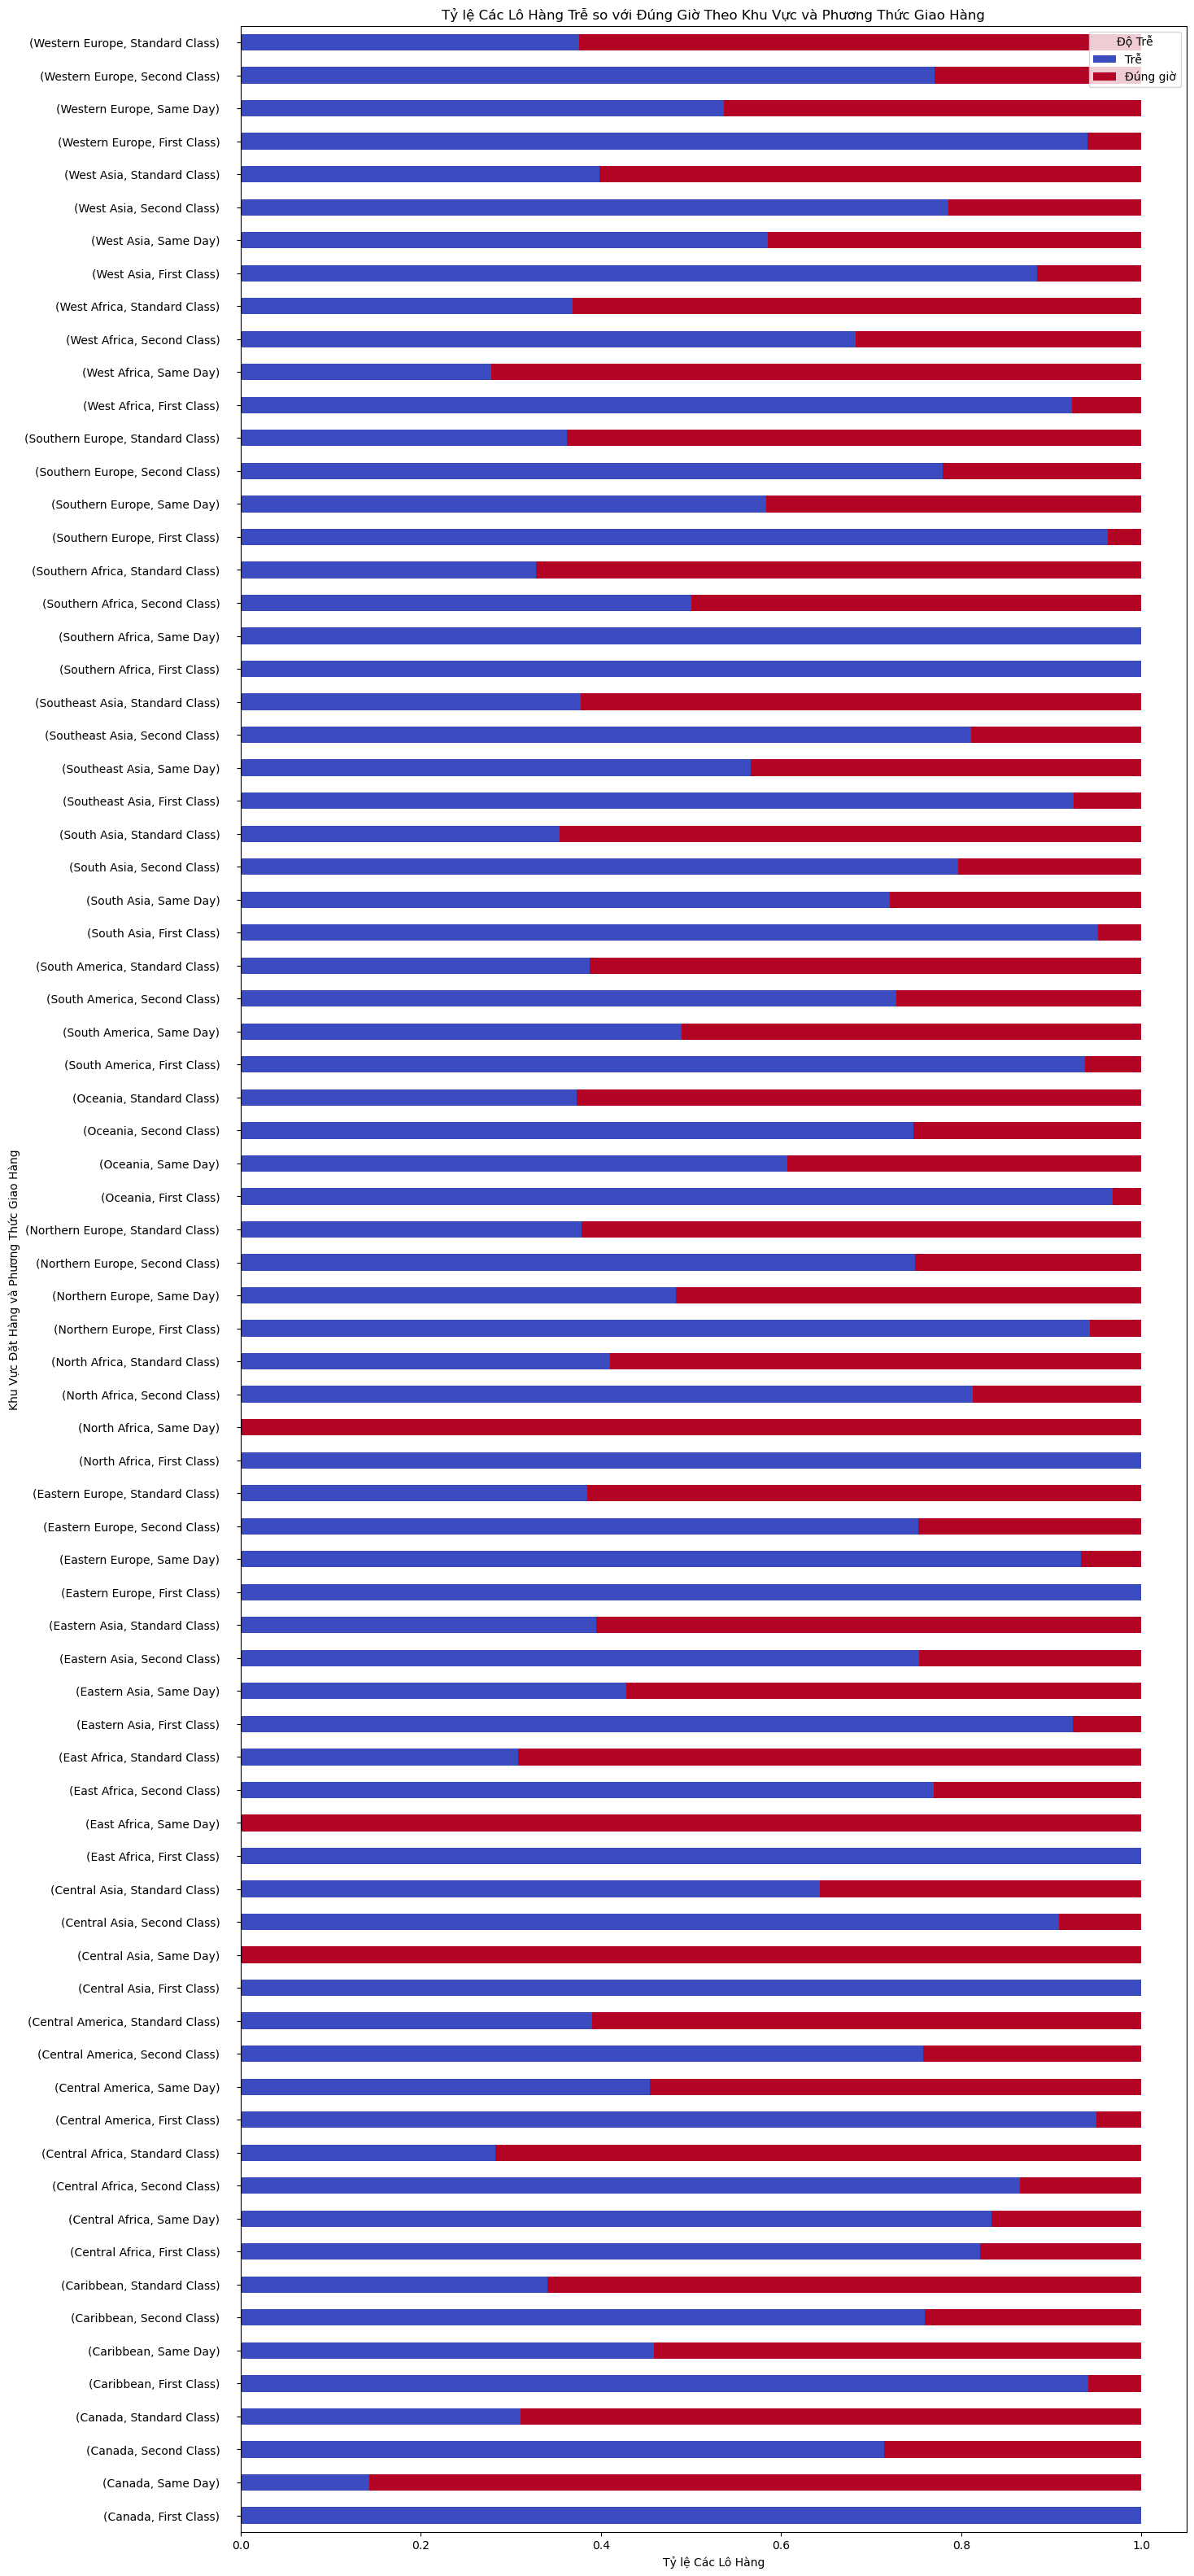

In [226]:
# Giả sử 'region_mode_lateness_prop' là DataFrame đã được chuẩn bị sẵn
plt.figure(figsize=(12, 10))  # Tăng kích thước biểu đồ để cải thiện khoảng cách giữa các nhãn

# Vẽ biểu đồ cột xếp chồng
ax = region_mode_lateness_prop.plot(kind='barh', stacked=True, colormap='coolwarm', figsize=(15, 40))

# Đặt tiêu đề cho biểu đồ
plt.title('Tỷ lệ Các Lô Hàng Trễ so với Đúng Giờ Theo Khu Vực và Phương Thức Giao Hàng')

# Đặt nhãn cho các trục
plt.xlabel('Tỷ lệ Các Lô Hàng')
plt.ylabel('Khu Vực Đặt Hàng và Phương Thức Giao Hàng')

# Điều chỉnh nhãn trục y
plt.yticks(rotation=0)  # Đặt nhãn trục y không xoay

# Tùy chỉnh khoảng cách giữa các nhãn trên trục y để cải thiện độ rõ ràng
ax.yaxis.set_tick_params(pad=15)  # Tăng khoảng cách padding cho mỗi nhãn

# Đặt chú giải
plt.legend(title='Độ Trễ')

# Hiển thị biểu đồ
plt.show()

# 7. Phân tích các yếu tố ảnh hưởng tới việc trễ giao hàng bằng mô hinh hôì quy

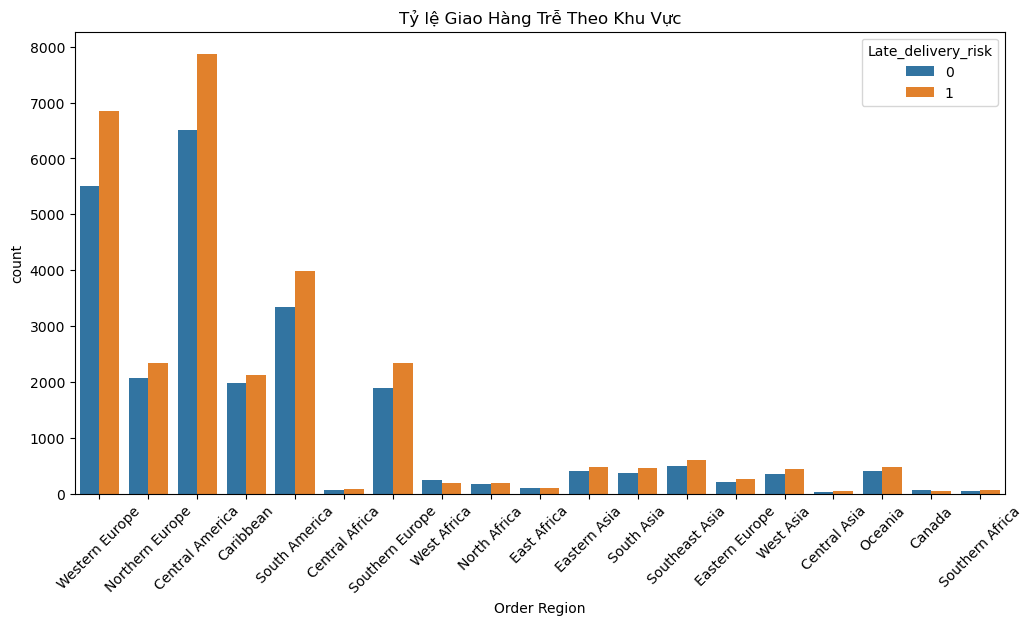

In [380]:
# Đánh giá sơ bộ dữ liệu về tỷ lệ trễ theo khu vực
plt.figure(figsize=(12, 6))
sns.countplot(x='Order Region', hue='Late_delivery_risk', data=data)
plt.title('Tỷ lệ Giao Hàng Trễ Theo Khu Vực')
plt.xticks(rotation=45)
plt.show()

In [271]:
# Tạo một bản sao của DataFrame để giữ nguyên dữ liệu gốc
data_copy = data.copy()

In [272]:
# Bây giờ 'data_copy' chứa các biến dummy và 'data' vẫn giữ nguyên không thay đổi
print(data_copy.head(10))  # Xem 5 dòng đầu của bản sao để kiểm tra các biến dummy

    Days for shipping (real)  Days for shipment (scheduled)  \
64                         2                              2   
65                         6                              2   
67                         2                              2   
69                         3                              2   
70                         2                              2   
71                         4                              2   
72                         3                              2   
75                         5                              2   
76                         4                              2   
80                         3                              2   

    Sales per customer   Delivery Status  Late_delivery_risk  Category Id  \
64          269.970001  Shipping on time                   0            9   
65          224.979996     Late delivery                   1            9   
67          167.369995  Shipping on time                   0           17  

In [315]:
# Lấy ra các cột cần thiết từ 'data_copy'
columns_needed = ['Delivery Status', 'Order Region', 'Shipping Mode', 'Late_delivery_risk','Order Item Quantity', 'Sales']
data_selected = data_copy[columns_needed]

In [316]:
# Hiển thị kết quả
data_selected.head(50)

,Delivery Status,Order Region,Shipping Mode,Late_delivery_risk,Order Item Quantity,Sales
64,Shipping on time,Western Europe,Second Class,0,3,299.970001
65,Late delivery,Western Europe,Second Class,1,3,299.970001
67,Shipping on time,Northern Europe,Second Class,0,3,179.970001
69,Late delivery,Western Europe,Second Class,1,3,179.970001
70,Shipping on time,Western Europe,Second Class,0,3,150.000000
71,Late delivery,Northern Europe,Second Class,1,3,119.970001
72,Late delivery,Western Europe,Second Class,1,3,150.000000
75,Late delivery,Central America,Second Class,1,3,179.970001
76,Late delivery,Central America,Second Class,1,3,179.970001
80,Late delivery,Caribbean,Second Class,1,3,179.970001


In [317]:
# Lọc bỏ các hàng có giá trị 'Shipping canceled' trong cột 'Delivery Status'
data_filtered = data_selected.query('`Delivery Status` != "Shipping canceled"')

In [318]:
# Hiển thị 50 dòng đầu tiên sau khi lọc
data_filtered.head(50)

,Delivery Status,Order Region,Shipping Mode,Late_delivery_risk,Order Item Quantity,Sales
64,Shipping on time,Western Europe,Second Class,0,3,299.970001
65,Late delivery,Western Europe,Second Class,1,3,299.970001
67,Shipping on time,Northern Europe,Second Class,0,3,179.970001
69,Late delivery,Western Europe,Second Class,1,3,179.970001
70,Shipping on time,Western Europe,Second Class,0,3,150.000000
71,Late delivery,Northern Europe,Second Class,1,3,119.970001
72,Late delivery,Western Europe,Second Class,1,3,150.000000
75,Late delivery,Central America,Second Class,1,3,179.970001
76,Late delivery,Central America,Second Class,1,3,179.970001
80,Late delivery,Caribbean,Second Class,1,3,179.970001


In [319]:
# In kiểu dữ liệu của tất cả các cột
print(data_filtered.dtypes)

Delivery Status         object
Order Region            object
Shipping Mode           object
Late_delivery_risk       int64
Order Item Quantity      int64
Sales                  float64
dtype: object


In [320]:
# Tạo đối tượng LabelEncoder
le = LabelEncoder()

In [321]:
# Chuyển đổi các cột bằng Label Encoding
data_filtered['Delivery Status'] = le.fit_transform(data_filtered['Delivery Status'])
data_filtered['Shipping Mode'] = le.fit_transform(data_filtered['Shipping Mode'])

/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_34356/4153188858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Delivery Status'] = le.fit_transform(data_filtered['Delivery Status'])
/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_34356/4153188858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Shipping Mode'] = le.fit_transform(data_filtered['Shipping Mode'])


In [322]:
# Tạo thứ tự ưu tiên cho 'Order Region'
priority_order = [
    'Central America', 'Western Europe', 'South America', 'Northern Europe', 
    'Central Africa', 'Caribbean', 'Eastern Asia', 'South Asia', 'Southeast Asia', 
    'Oceania', 'West Asia', 'Eastern Europe', 'Southern Europe', 
    'Central Asia', 'Canada', 'Southern Africa'
]

# Tạo từ điển ánh xạ giá trị trong cột 'Order Region' thành số tương ứng theo thứ tự ưu tiên
priority_mapping = {region: idx for idx, region in enumerate(priority_order)}

# Chuyển đổi cột 'Order Region' bằng cách sử dụng ánh xạ thứ tự ưu tiên
data_filtered['Order Region'] = data_filtered['Order Region'].map(priority_mapping)

# Kiểm tra kết quả sau khi mã hóa
data_filtered[['Order Region']].head(10)

/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_34356/1274445435.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Order Region'] = data_filtered['Order Region'].map(priority_mapping)


,Order Region
64,1.0
65,1.0
67,3.0
69,1.0
70,1.0
71,3.0
72,1.0
75,0.0
76,0.0
80,5.0


In [323]:
# Hiển thị kết quả sau khi mã hóa
data_filtered.head(50)

,Delivery Status,Order Region,Shipping Mode,Late_delivery_risk,Order Item Quantity,Sales
64,2,1.0,2,0,3,299.970001
65,1,1.0,2,1,3,299.970001
67,2,3.0,2,0,3,179.970001
69,1,1.0,2,1,3,179.970001
70,2,1.0,2,0,3,150.000000
71,1,3.0,2,1,3,119.970001
72,1,1.0,2,1,3,150.000000
75,1,0.0,2,1,3,179.970001
76,1,0.0,2,1,3,179.970001
80,1,5.0,2,1,3,179.970001


In [324]:
# Lọc ra các dòng có giá trị NaN trong cột 'Order Region'
rows_with_nan_order_region = data_filtered[data_filtered['Order Region'].isna()]

# Hiển thị các dòng bị NaN trong cột 'Order Region'
rows_with_nan_order_region

,Delivery Status,Order Region,Shipping Mode,Late_delivery_risk,Order Item Quantity,Sales
207,1,NaN,3,1,4,239.960007
210,1,NaN,3,1,4,239.960007
220,1,NaN,3,1,4,399.959992
733,2,NaN,3,0,4,239.960007
744,2,NaN,3,0,4,159.960007
...,...,...,...,...,...,...
179329,0,NaN,3,0,5,299.950012
179338,1,NaN,3,1,5,250.000000
179349,2,NaN,3,0,5,250.000000
179422,2,NaN,3,0,5,499.950012


In [325]:
# Loại bỏ các giá trị NaN trong các cột cần thiết
imputer = SimpleImputer(strategy='mean')
X = data_filtered.drop(columns=['Late_delivery_risk'])  # Xóa cột mục tiêu
X = imputer.fit_transform(X)
y = data_filtered['Late_delivery_risk']

In [338]:
# Hiển thị kết quả sau khi mã hóa
data_filtered.head(50)

,Delivery Status,Order Region,Shipping Mode,Late_delivery_risk,Order Item Quantity,Sales
64,2,1.0,2,0,3,299.970001
65,1,1.0,2,1,3,299.970001
67,2,3.0,2,0,3,179.970001
69,1,1.0,2,1,3,179.970001
70,2,1.0,2,0,3,150.000000
71,1,3.0,2,1,3,119.970001
72,1,1.0,2,1,3,150.000000
75,1,0.0,2,1,3,179.970001
76,1,0.0,2,1,3,179.970001
80,1,5.0,2,1,3,179.970001


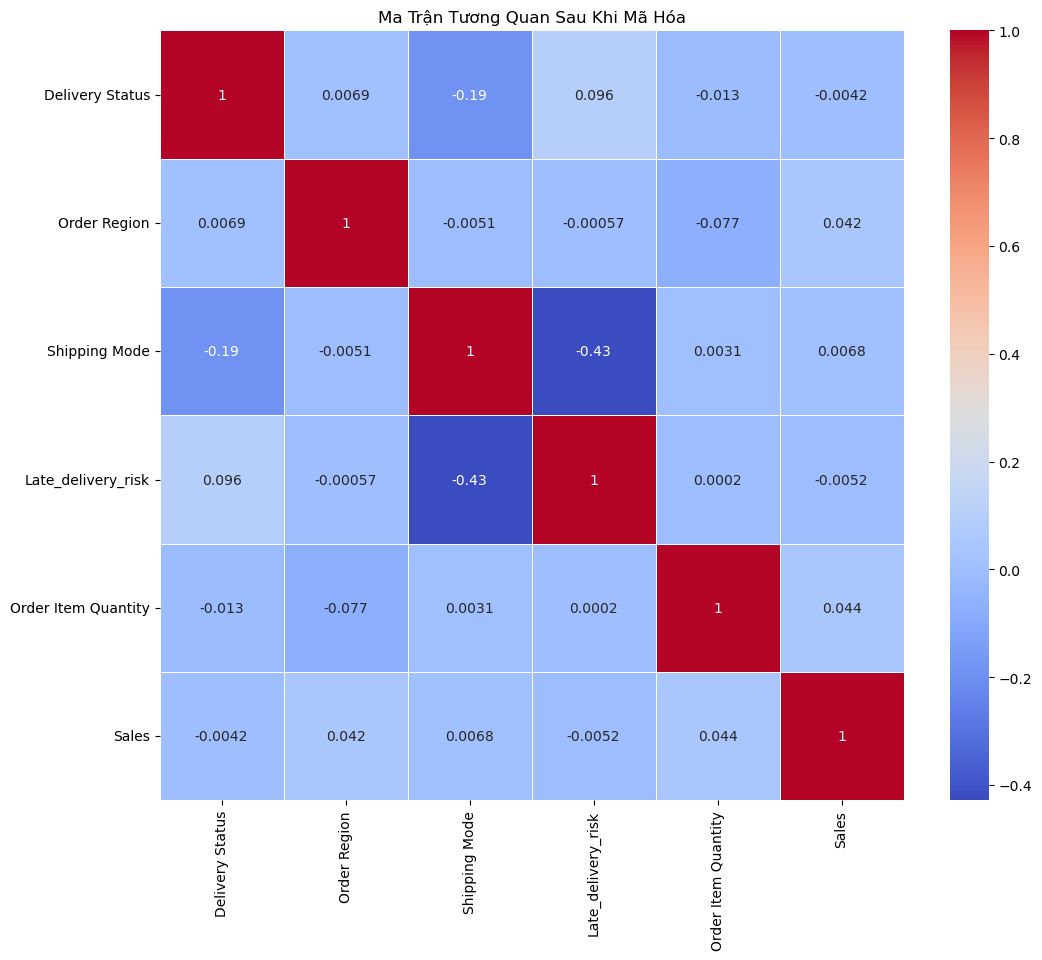

In [340]:
# Tính ma trận tương quan giữa các biến số sau khi mã hóa
correlation_matrix = data_filtered.corr()

# Vẽ heatmap thể hiện sự tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Đặt tiêu đề cho biểu đồ
plt.title('Ma Trận Tương Quan Sau Khi Mã Hóa')

# Hiển thị biểu đồ
plt.show()

# 8. Chạy mô hình hồi quy

In [326]:
# Xử lý outliers bằng Isolation Forest
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(X)

In [327]:
# Lọc các giá trị không phải outliers
X_filtered = X[outliers != -1]
y_filtered = y[outliers != -1]

In [381]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

In [382]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_filtered, test_size=0.3, random_state=42)

In [383]:
# Huấn luyện mô hình Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [384]:
# Cross-validation (Kiểm tra chéo)
cv_scores = cross_val_score(lr_model, X_scaled, y_filtered, cv=5)  # 5-fold CV
print("Cross-validation scores:", cv_scores)
print("Average CV score:", np.mean(cv_scores))

Cross-validation scores: [0.7145552  0.70519313 0.7057889  0.67361732 0.68493695]
Average CV score: 0.6968182989732392


In [385]:
# Dự đoán và đánh giá mô hình
y_pred_lr = lr_model.predict(X_test)

In [333]:
# In kết quả
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy (Logistic Regression): 0.6964321175613953
Confusion Matrix:
 [[5528  965]
 [3621 4993]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.85      0.71      6493
           1       0.84      0.58      0.69      8614

    accuracy                           0.70     15107
   macro avg       0.72      0.72      0.70     15107
weighted avg       0.74      0.70      0.69     15107



In [386]:
# Đánh giá các biến ảnh hưởng
# Logistic Regression không có sẵn trực tiếp importance feature như các cây quyết định, nên ta dùng hệ số hồi quy
feature_importance = pd.Series(lr_model.coef_[0], index=data_filtered.drop(columns=['Late_delivery_risk']).columns)
feature_importance = feature_importance.sort_values(ascending=False)

In [387]:
# Top 5 yếu tố ảnh hưởng nhiều nhất
print("Top 10 yếu tố ảnh hưởng đến việc trễ giao hàng:")
print(feature_importance.head(5))

Top 10 yếu tố ảnh hưởng đến việc trễ giao hàng:
Sales                  0.031365
Order Item Quantity    0.014363
Order Region           0.004633
Delivery Status        0.002585
Shipping Mode         -1.306946
dtype: float64


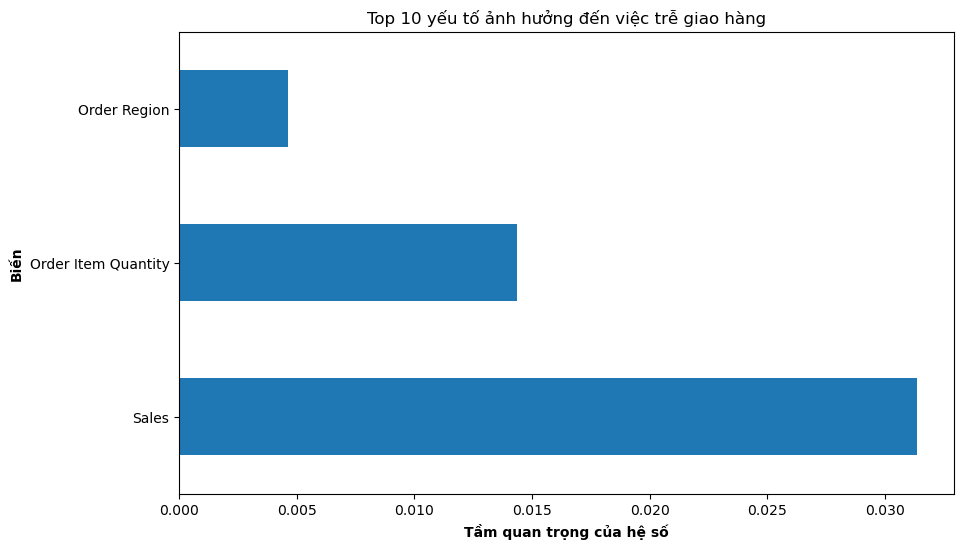

In [389]:
# Biểu đồ trực quan hóa
plt.figure(figsize=(10,6))
feature_importance.head(3).plot(kind='barh')
plt.title("Top 10 yếu tố ảnh hưởng đến việc trễ giao hàng")
plt.xlabel("Tầm quan trọng của hệ số", fontweight ="bold")
plt.ylabel("Biến", fontweight ="bold")
plt.show()